# ニューラルネットワーク


## 活性化関数の実装

シグモイド関数

```
h(x) = \frac{1}{1+\exp(-x)}
```

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### ステップ関数

In [3]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

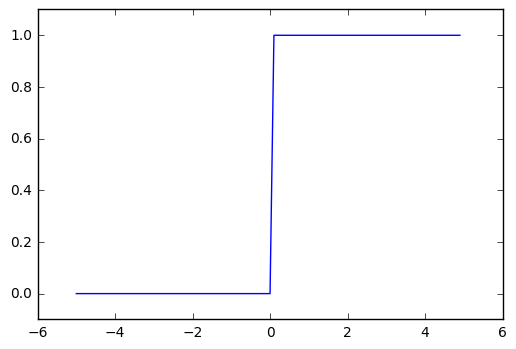

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### シグモイド関数

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

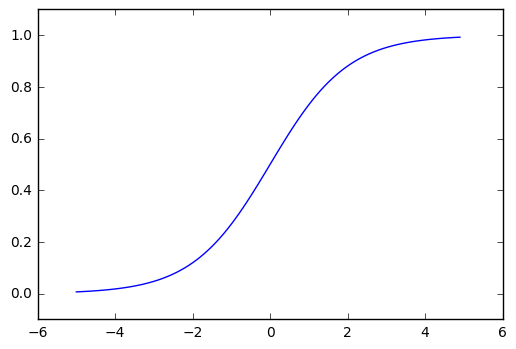

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 滑らかさは異なるが、大きな視点から見ると同じ形をしている
    - 入力が小さいとき → 出力は 0 に近い
    - 入力が大きいとき → 出力は 1 に近い
    - 出力信号は必ず [0 1] に収まる
    
- ともに "非線形関数" である
    - シグモイド関数 → 曲線 / ステップ関数 → 折れ曲がった直線
    - 活性化関数には線形関数を用いる
    
- 活性化関数に線形関数を用いると ... ?
    - NN の層を厚くする意味を失う
    - ex) h(x) = cx のとき → y(x) = h(h(h(x))) の 3 層は y(x) = 

### ReLU 関数

In [10]:
def relu(x):
    return np.maximum(0, x)

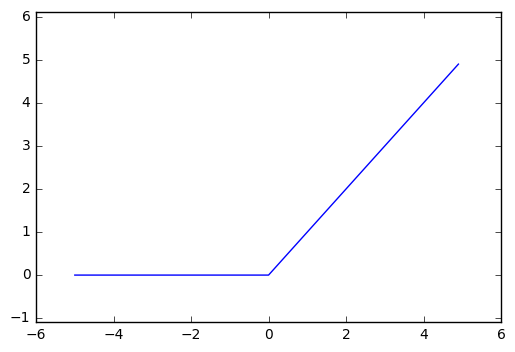

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 6.1)
plt.show()